In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_excel('heart_disease.xlsx')

In [3]:
df.head(20)

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [4]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [6]:
excel_file = pd.ExcelFile('heart_disease.xlsx')
excel_file.sheet_names

['Description', 'Heart_disease']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df. shape

(908, 13)

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
# 3. Statistical summary
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [11]:
# 4. Class distribution of target
print("\nTarget Distribution:\n", df['num'].value_counts())


Target Distribution:
 0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64


In [12]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

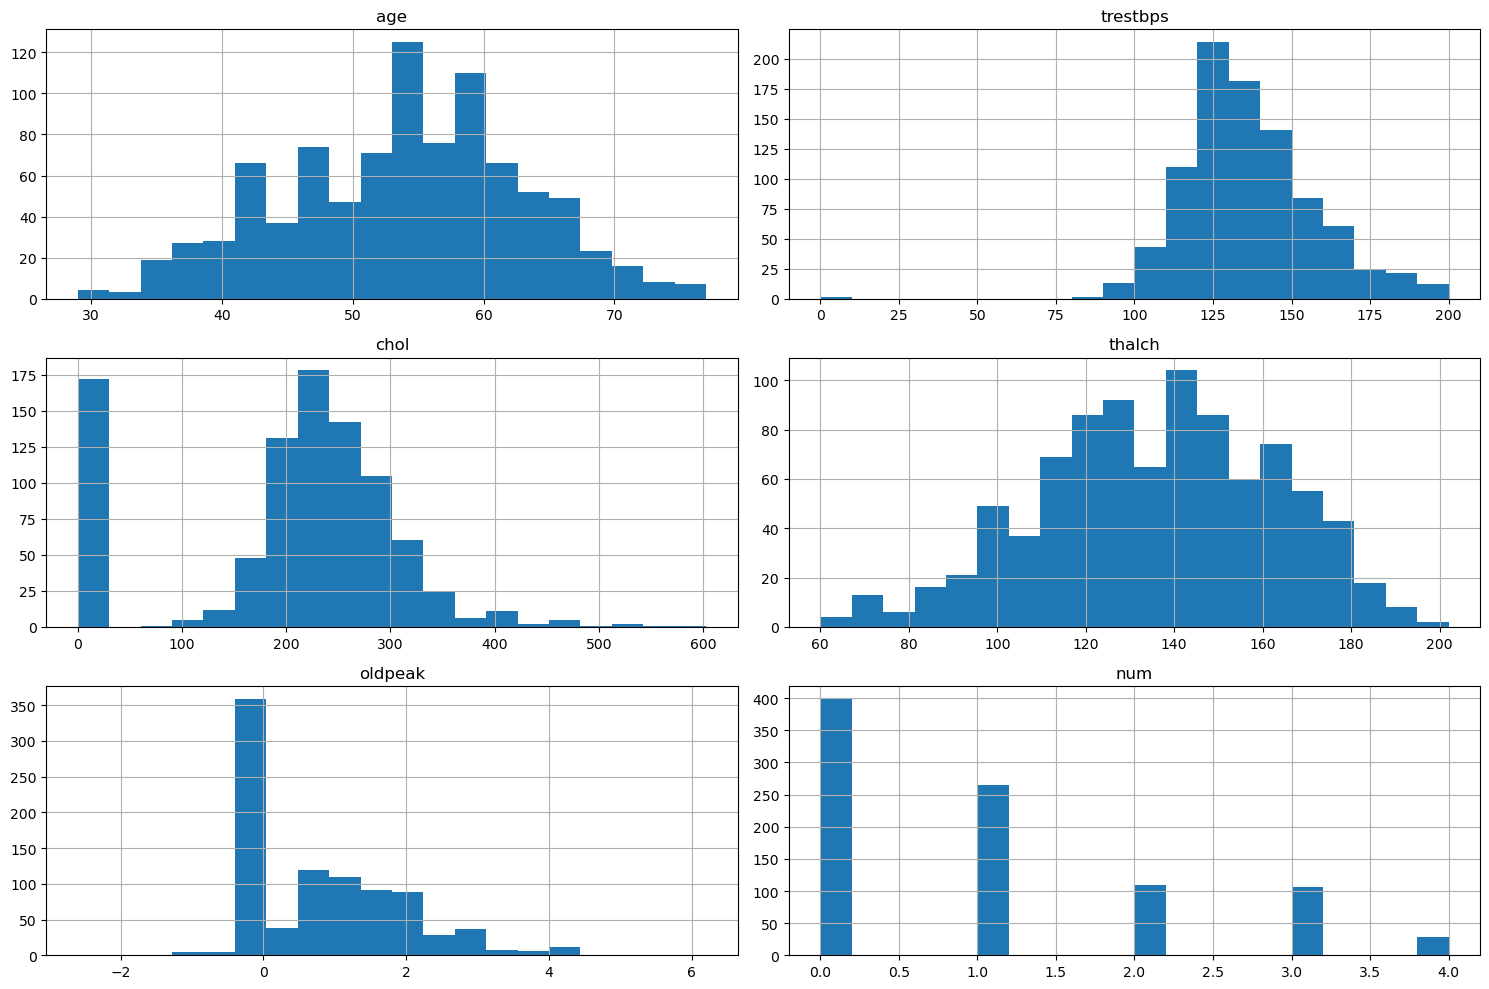

In [13]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1404\745494852.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


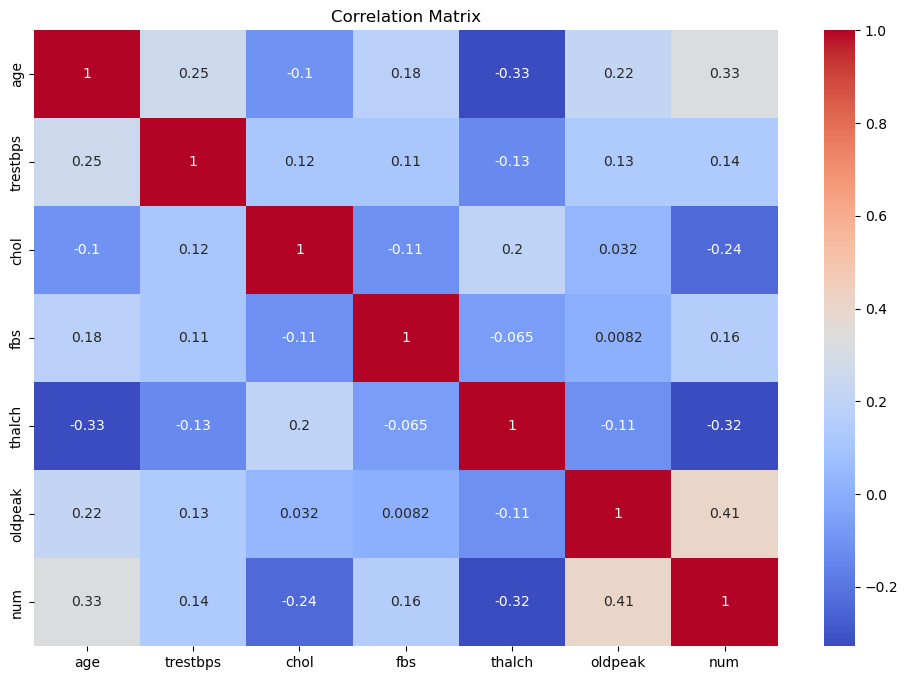

In [14]:
# 7. Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [15]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

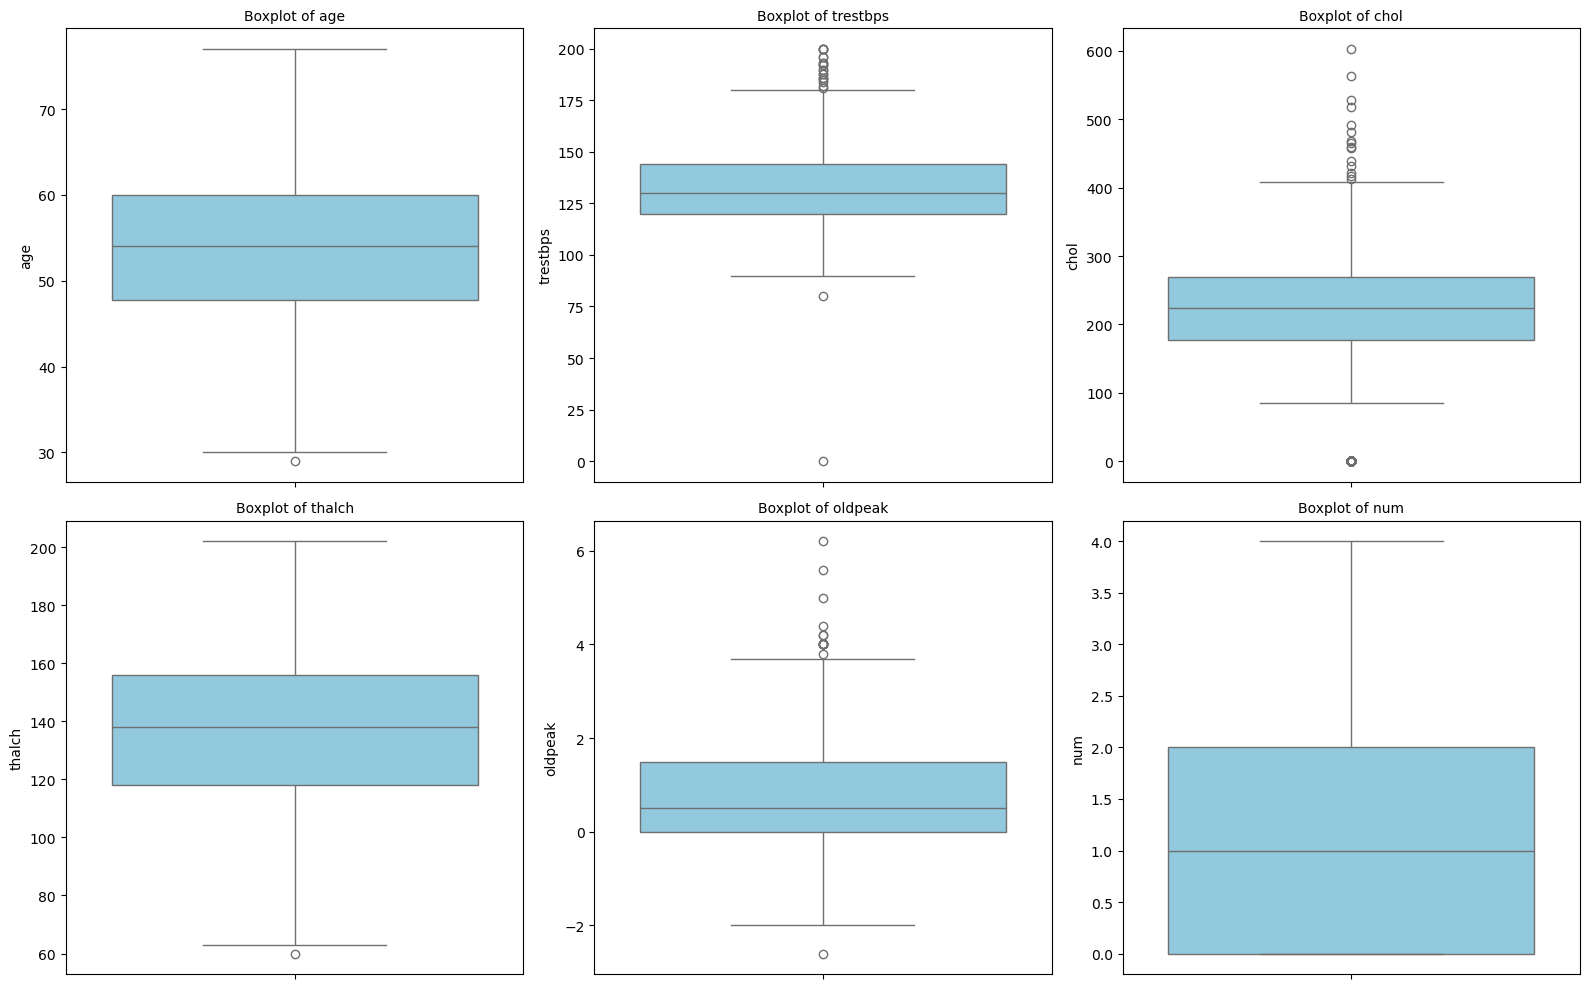

In [16]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)  # arrange in 3 columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()
plt.show()

In [17]:
def Outcap(df,columns):
    Q1=df[columns].quantile(0.25)
    Q3=df[columns].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[columns]=df[columns].apply(lambda x:lower if x<lower else upper if x>upper else x)
for col in num_cols:
    Outcap(df,col)

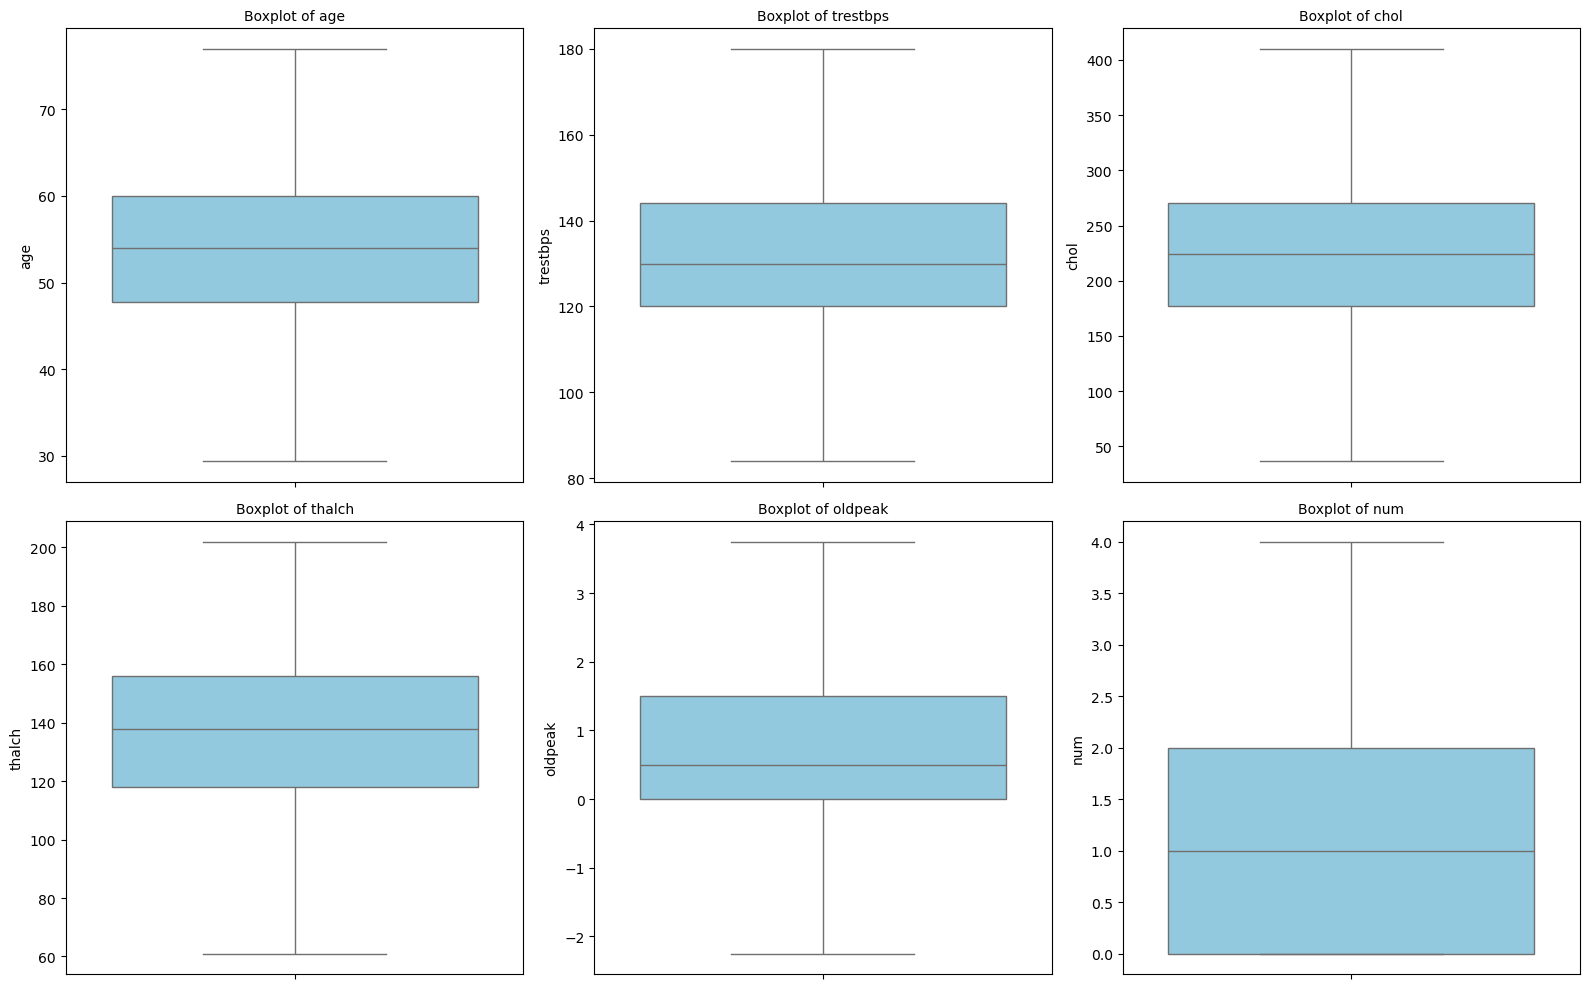

In [18]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)  # arrange in 3 columns
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()
plt.show()

In [19]:
df['exang'].value_counts()


False    516
True     337
TURE      36
FALSE     19
Name: exang, dtype: int64

In [20]:
df.loc[df['exang'] == 'TURE', 'exang'] = True
df.loc[df['exang'] == 'FALSE', 'exang'] = False

In [21]:

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,145.0,233.000,True,150.0,2.3,0,1,0,0,1,0,0,0,0,0,0,0
1,41.0,135.0,203.000,False,132.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0
2,57.0,140.0,192.000,False,148.0,0.4,0,1,0,0,0,1,0,0,1,0,0,0
3,52.0,118.0,186.000,False,190.0,0.0,0,1,0,0,1,0,0,0,1,0,0,0
4,57.0,110.0,201.000,False,126.0,1.5,0,1,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,125.0,36.875,False,120.0,1.5,4,1,0,0,0,1,0,0,0,1,0,1
904,62.0,166.0,170.000,False,120.0,3.0,4,1,0,0,0,0,1,1,1,0,0,1
905,56.0,170.0,36.875,False,123.0,2.5,4,1,0,1,0,0,0,1,0,0,1,0
906,56.0,144.0,208.000,True,105.0,0.5,4,1,0,1,0,0,1,1,0,0,0,0


In [22]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num'].apply(lambda x: 1 if x > 0 else 0) 

Does this person have heart disease or not?"

Clinical Relevance: Doctors usually care first about detecting presence of disease, not the exact stage.

Class Imbalance: Often, the higher severity levels (2, 3, 4) have fewer instances, making multi-class classification harder and potentially unreliable.

Simpler Evaluation: Binary classification allows using metrics like ROC-AUC, precision-recall, and simplifies model tuning.

In [24]:
scaler = StandardScaler()
X[X.select_dtypes(include=['int64','float64']).columns] = scaler.fit_transform(X[X.select_dtypes(include=['int64','float64']).columns])

In [25]:
X

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006104,0.607417,0.264845,True,0.524203,1.411045,1,0,0,1,0,0,0,0,0,0,0
1,-1.397775,0.089009,-0.045006,False,-0.147763,-0.834669,1,1,0,0,1,0,0,1,0,0,0
2,0.350500,0.348213,-0.158618,False,0.449540,-0.444110,1,0,0,0,1,0,0,1,0,0,0
3,-0.195836,-0.792285,-0.220589,False,2.017461,-0.834669,1,0,0,1,0,0,0,1,0,0,0
4,0.350500,-1.207012,-0.065663,False,-0.371752,0.629927,1,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086568,-0.429400,-1.760808,False,-0.595741,0.629927,1,0,0,0,1,0,0,0,1,0,1
904,0.896837,1.696074,-0.385843,False,-0.595741,2.094523,1,0,0,0,0,1,1,1,0,0,1
905,0.241233,1.903437,-1.760808,False,-0.483747,1.606325,1,0,1,0,0,0,1,0,0,1,0
906,0.241233,0.555576,0.006636,True,-1.155713,-0.346471,1,0,1,0,0,1,1,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# X = features, y = target (already preprocessed earlier)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

In [29]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# Predict
y_pred = dt_model.predict(X_test)

In [32]:

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6978021978021978

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66        80
           1       0.73      0.73      0.73       102

    accuracy                           0.70       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.70      0.70      0.70       182


Confusion Matrix:
 [[53 27]
 [28 74]]


In [33]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [34]:
dt = DecisionTreeClassifier(random_state=42)

In [35]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [36]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [37]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.765810108644308


In [38]:
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [39]:
y_pred_best = best_dt.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        80
           1       0.79      0.69      0.73       102

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.72      0.72       182



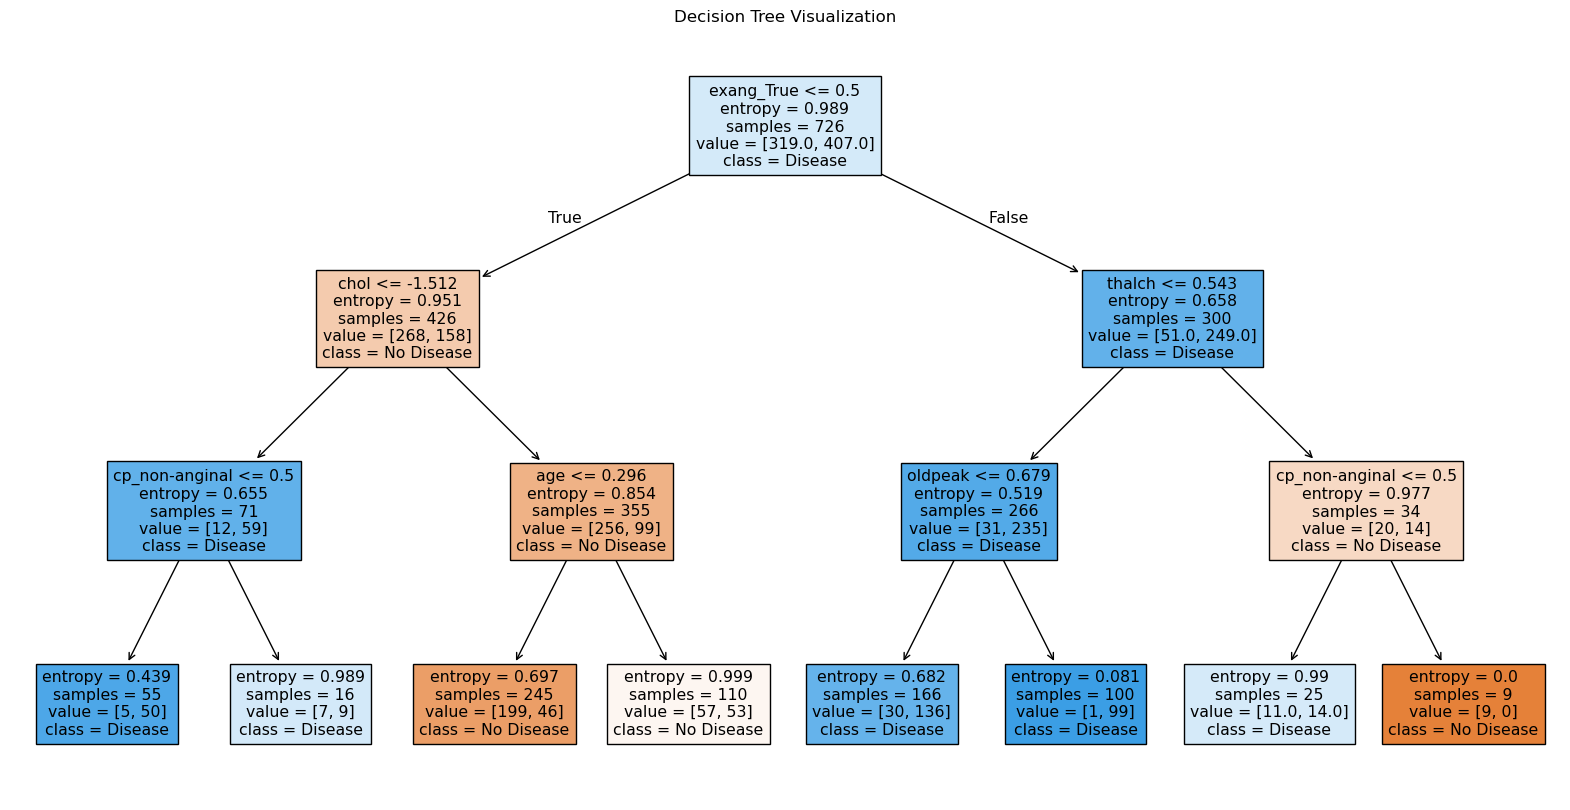

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree Visualization")
plt.show()

In [41]:
y_pred_best = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Accuracy: 0.7197802197802198

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71        80
           1       0.79      0.69      0.73       102

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.73      0.72      0.72       182


Confusion Matrix:
 [[61 19]
 [32 70]]
